In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
df_schema = pd.read_csv('survey_results_schema.csv')
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [4]:
df_schema.shape#(154,2)
df_schema.isnull().mean() #no null
#set(df_schema.columns[df_schema.isnull().mean() > 0])
df_schema.isnull().sum()
np.sum(df_schema.isnull())
df_schema['Column']
#slicing row
df_schema.iloc[[2]]
df_schema.loc[[2]]
# Syntax for iloc indexing to finding a specific data element
#dat.iloc[row, column]

,Column,Question
2,ProgramHobby,Do you program as a hobby or contribute to ope...


In [58]:
df_public = pd.read_csv('survey_results_public.csv')
df_public.shape #(51392, 154)

(51392, 154)

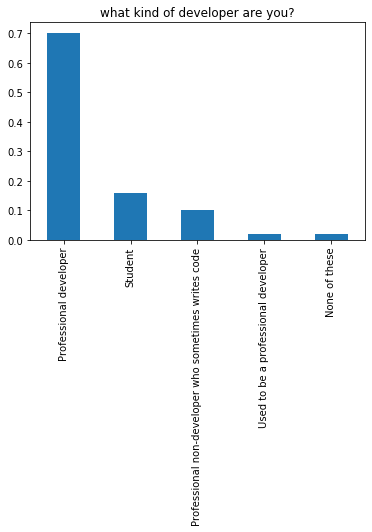

In [62]:
df_public.isnull()
df_public.isnull().mean()
df_public.isnull().sum()
np.sum(df_public.isnull())
set(df_public.columns[df_public.isnull().mean()>0.5])
#df_public.shape#(51392,154)
no_nulls = set(df_public.columns[df_public.isnull().mean()==0]) 
#({'Country', 'EmploymentStatus', 'FormalEducation', 'Professional', 'ProgramHobby', 'Respondent', 'University'})
most_missing_cols = set(df_public.columns[df_public.isnull().mean()>0.75])
#{'ExCoder10Years', 'ExCoderActive', 'ExCoderBalance', 'ExCoderBelonged', 'ExCoderNotForMe', 'ExCoderReturn',
#'ExCoderSkills', 'ExCoderWillNotCode', 'ExpectedSalary', 'MobileDeveloperType', 'NonDeveloperType',
#'TimeAfterBootcamp', 'WebDeveloperType', 'YearsCodedJobPast'}
status_vals = df_public['Professional'].value_counts()
#df_public.Professional.value_counts()
(status_vals/df_public.shape[0]).plot(kind="bar");
plt.title("what kind of developer are you?");


Text(0.5, 1.0, 'Program hobbies')

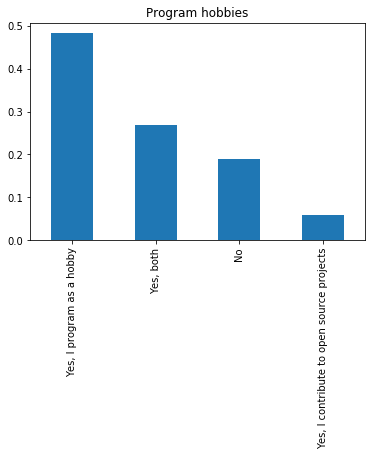

In [6]:
hobby_vals = df_public["ProgramHobby"].value_counts()
(hobby_vals/df_public.shape[0]).plot(kind="bar");
plt.title("Program hobbies")

Text(0.5, 1.0, 'Top 10 Country')

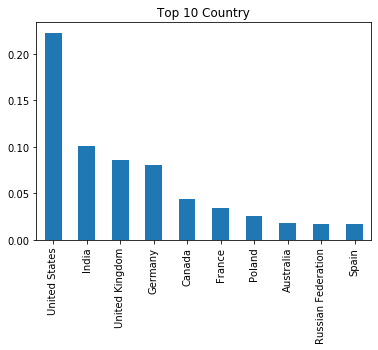

In [7]:
country_vals = df_public["Country"].value_counts()
(country_vals[:10]/df_public.shape[0]).plot(kind="bar");
plt.title("Top 10 Country")

Text(0.5, 1.0, 'FormalEducation')

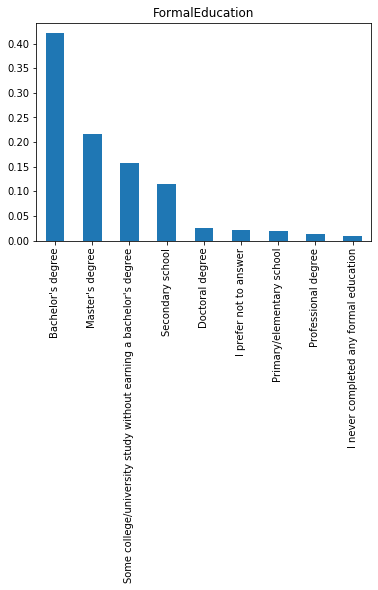

In [8]:
ed_vals = df_public['FormalEducation'].value_counts()
(ed_vals/df_public.shape[0]).plot(kind="bar");
plt.title("FormalEducation")


In [9]:
list(df_schema[df_schema['Column'] == 'Country' ]['Question'])[0]


'In which country do you currently live?'

In [13]:
#'CousinEducation' in df_schema
def get_description(column_name, schema=df_schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df_public.columns[90]) # This should return a string of the first column description
get_description(df_public.columns[86]) 
        

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [15]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

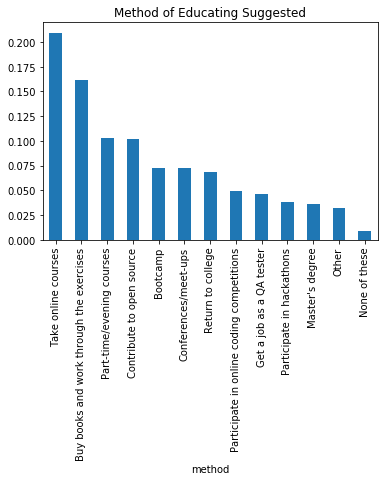

In [16]:
get_description('ProgramHobby')#'Do you program as a hobby or contribute to open source projects?'
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df_public)

In [17]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral degree", "Professional degree"):
        return 1
    else:
        return 0
    

df_public['HigherEd'] = df_public["FormalEducation"].apply(higher_ed) #Test your function to assure it provides 1 and 0 values for the df
df_public['HigherEd'].mean()


0.25614881693648817

In [18]:
ed_1 = df_public[df_public['HigherEd'] == 1]
ed_0 = df_public[df_public['HigherEd'] == 0]
print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

3    1
4    1
6    1
7    1
9    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
5    0
8    0
Name: HigherEd, dtype: int64


In [223]:
ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)
comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])


,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.206234,0.210548,-0.004314
Buy books and work through the exercises,0.162959,0.160867,0.002092
Part-time/evening courses,0.101736,0.103791,-0.002055
Contribute to open source,0.100409,0.102513,-0.002104
Bootcamp,0.074762,0.071677,0.003085
Return to college,0.068975,0.068898,0.000077
Conferences/meet-ups,0.064461,0.074679,-0.010218
Master's degree,0.060532,0.027778,0.032754
Get a job as a QA tester,0.047257,0.046068,0.001190


In [19]:
bootcamp_df = df_public[df_public['TimeAfterBootcamp'].isnull()==False] #2602 rows × 155 columns
not_bootcamp_df = df_public[df_public['TimeAfterBootcamp'].isnull()==True] #48790 rows × 155 columns
bootcamp_df.shape #(2602, 155 )
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0]-sum(bootcamp_df['Gender'].isnull()))
#sum(bootcamp_df['Gender'].isnull()) #433
#np.sum(bootcamp_df['Gender'].isnull()) #433

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Female; Gender non-conforming                              0.001383
Male; Gender non-conforming                                0.001383
Female; Transgender; Gender non-conforming                 0.000922
Male; Female                                               0.000922
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Male; Transgender                                          0.000922
Transgender                                                0.000922
Transgender; Gender non-conforming                         0.000922
Female; Gender non-conforming; Other                       0.000461
Male; Female; Transgender; Gender non-conforming

In [62]:
np.sum(bootcamp_df['Gender'].value_counts())#/df_public.shape[0]

2169

In [20]:
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0]-sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Transgender; Gender non-conforming                         0.000395
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Male; Female                                               0.000395
Male; Transgender                                          0.000274
Female; Transgender; Gender non-conforming                 0.000182
Male; Female; Transgender; Gender non-conforming

In [21]:
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0]-sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

In [22]:
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0]-sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

In [23]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/(bootcamp_df.shape[0])

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

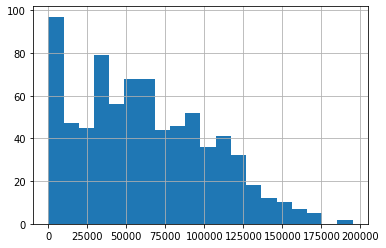

In [24]:
bootcamp_df['Salary'].hist(bins=20)

In [25]:
df_public['JobSatisfaction'].isnull().mean()

0.21435242839352428

In [26]:
df_public.groupby(['EmploymentStatus']).mean()['JobSatisfaction'].sort_values()

EmploymentStatus
Employed part-time                                      6.821468
Employed full-time                                      6.926805
Not employed, and not looking for work                  7.000000
Independent contractor, freelancer, or self-employed    7.252823
I prefer not to say                                          NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [27]:
df_public.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()

CompanySize
5,000 to 9,999 employees    6.748153
10,000 or more employees    6.810345
I don't know                6.842679
500 to 999 employees        6.883661
1,000 to 4,999 employees    6.884509
100 to 499 employees        6.937089
20 to 99 employees          6.949092
10 to 19 employees          7.000799
Fewer than 10 employees     7.008749
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

In [28]:
df_public.groupby(['ProgramHobby']).mean()['JobSatisfaction'].sort_values().dropna()

ProgramHobby
No                                           6.833825
Yes, I program as a hobby                    6.913072
Yes, I contribute to open source projects    7.041535
Yes, both                                    7.108041
Name: JobSatisfaction, dtype: float64

In [29]:
df_public.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna()

HomeRemote
Never                                                      6.632502
It's complicated                                           6.840830
More than half, but not all, the time                      6.953184
About half the time                                        6.973702
A few days each month                                      7.077509
Less than half the time, but at least one day each week    7.120125
All or almost all the time (I'm full-time remote)          7.388430
Name: JobSatisfaction, dtype: float64

In [30]:
df_public.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values().dropna()

FormalEducation
I never completed any formal education                               6.833333
Bachelor's degree                                                    6.866363
Master's degree                                                      6.953151
Primary/elementary school                                            6.956897
I prefer not to answer                                               7.005682
Some college/university study without earning a bachelor's degree    7.081334
Professional degree                                                  7.087459
Secondary school                                                     7.143082
Doctoral degree                                                      7.348857
Name: JobSatisfaction, dtype: float64

In [31]:
df_public.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,HigherEd
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000,51392.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468,0.256149
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829,0.436509
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484,0.000000
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691,0.000000
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806,1.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000,1.000000


In [273]:
df_public.hist;

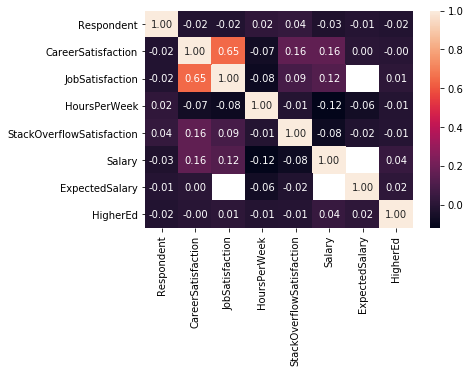

In [32]:
sns.heatmap(df_public.corr(), annot=True, fmt='.2f')

In [33]:
X = df_public[['CareerSatisfaction','JobSatisfaction','HoursPerWeek','StackOverflowSatisfaction']]
y = df_public['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
#instantiate
#fit training
#predict test data
#score your model on the test
lm_model = LinearRegression(normalize=True)
lm_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
X_train.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction
46417,7.0,6.0,0.0,8.0
41666,8.0,8.0,1.0,8.0
40169,NaN,NaN,NaN,NaN
51371,7.0,7.0,NaN,8.0
25486,6.0,7.0,NaN,NaN


In [35]:
#lm_model.fit(X_train, y_train)
num_vars = df_public[['Salary', 'CareerSatisfaction','JobSatisfaction','HoursPerWeek','StackOverflowSatisfaction']]
num_vars.head()

,Salary,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction
0,NaN,NaN,NaN,0.0,9.0
1,NaN,NaN,NaN,NaN,8.0
2,113750.0,8.0,9.0,NaN,8.0
3,NaN,6.0,3.0,5.0,10.0
4,NaN,6.0,8.0,NaN,NaN


In [36]:
prop_sals = 1 - num_vars['Salary'].isnull().mean()
num_vars.dropna(subset=['Salary'], axis=0,how='any')

,Salary,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction
2,113750.000000,8.0,9.0,NaN,8.0
14,100000.000000,8.0,8.0,NaN,8.0
17,130000.000000,9.0,8.0,NaN,8.0
18,82500.000000,5.0,3.0,NaN,NaN
22,100764.000000,8.0,9.0,NaN,8.0
...,...,...,...,...,...
51371,74193.548387,7.0,7.0,NaN,8.0
51378,107526.881720,10.0,10.0,NaN,10.0
51382,32258.064516,9.0,5.0,0.0,7.0
51387,58000.000000,7.0,3.0,5.0,9.0


In [37]:
sal_rm = num_vars.dropna(subset=['Salary'], axis=0,how='any') #12891
X = sal_rm[['CareerSatisfaction','JobSatisfaction','HoursPerWeek','StackOverflowSatisfaction']]
y = sal_rm['Salary']
# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
#instantiate
#fit training
#predict test data
#score your model on the test
lm_model = LinearRegression(normalize=True)
# Split data into training and test data, and fit a linear model
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

Oh no! It doesn't work!!!


In [38]:
all_rm = num_vars.dropna(axis=0)# dataframe with rows for nan Salaries removed
X_2 = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y_2 = all_rm['Salary']

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")
    
y_test_preds = lm_2_model.predict(X_2_test)# Predictions here
r2_test = r2_score(y_2_test, y_test_preds) # Rsquared here
r2_score(y_2_test, y_test_preds)

0.030994664959115403

In [39]:
print("The number of salaries in the original dataframe is " + str(np.sum(df_public.Salary.notnull()))) 
print("The number of salaries predicted using our model is " + str(len(y_test_preds)))
print("This is bad because we only predicted " + str(len(y_test_preds)/np.sum(df_public.Salary.notnull())) + " of the salaries in the dataset.")

The number of salaries in the original dataframe is 12891
The number of salaries predicted using our model is 1602
This is bad because we only predicted 0.1242727484291366 of the salaries in the dataset.


In [40]:
#Only use quant variables and drop any rows with missing values

num_vars = df_public[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
df_dropna = num_vars.dropna(axis=0)
#Split into explanatory and response variables
X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.030994664959115403 on 1602 values.'

In [41]:
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0) #Drop the rows with missing salaries

# test look
drop_sal_df.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,NaN,9.0,8.0
14,100000.0,8.0,NaN,8.0,8.0
17,130000.0,9.0,NaN,8.0,8.0
18,82500.0,5.0,NaN,3.0,NaN
22,100764.0,8.0,NaN,9.0,8.0


In [42]:
fill_mean = lambda col: col.fillna(col.mean()) # Mean function

fill_df = drop_sal_df.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

# test look
fill_df.head()

,Salary,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction
2,113750.0,8.0,2.64292,9.0,8.000000
14,100000.0,8.0,2.64292,8.0,8.000000
17,130000.0,9.0,2.64292,8.0,8.000000
18,82500.0,5.0,2.64292,3.0,8.511858
22,100764.0,8.0,2.64292,9.0,8.000000


In [43]:
#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.04072431792894726 on 3868 values.'

In [45]:
#Only use quant variables and drop any rows with missing values
num_vars = df_public[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.04072431792894726 on 3868 values.'

In [46]:
cat_df = df_public.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] == 0)# no missing value
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > 0.5)# more than half missing value
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > 0.75)# more than 0.75 missing value

13

In [47]:
cat_df.columns

Index(['Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize', 'CompanyType',
       ...
       'StackOverflowBetter', 'StackOverflowWhatDo', 'StackOverflowMakeMoney',
       'Gender', 'HighestEducationParents', 'Race', 'SurveyLong',
       'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers'],
      dtype='object', length=147)

In [48]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [49]:
#Dropping where the salary has missing values
df  = df_public.dropna(subset=['Salary'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(12891, 21111)


In [50]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)

In [51]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 1.0.  The rsquared on the test data was -0.5320377696670546.


In [ ]:
a = 'test_score'
b = 'train_score'
c = 'linear model (lm_model)'
d = 'X_train and y_train'
e = 'X_test'
f = 'y_test'
g = 'train and test data sets'
h = 'overfitting'

q1_piat = '''In order to understand how well our {} fit the dataset, 
            we first needed to split our data into {}.  
            Then we were able to fit our {} on the {}.  
            We could then predict using our {}  by providing 
            the linear model the {} for it to make predictions.  
            These predictions were for {}. 

            By looking at the {}, it looked like we were doing awesome because 
            it was 1!  However, looking at the {} suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            {}.'''.format(c, g, c, d, c, e, f, b, a, h)

print(q1_piat)

In [52]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [54]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_public)    

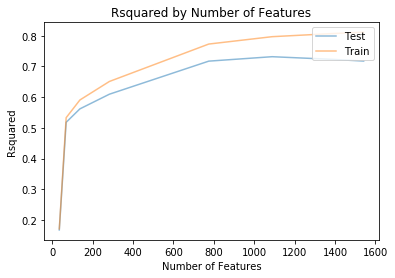

1089
0.7316766986704022
0.7968545363044823


In [55]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

In [56]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
43,Country_United States,56731.283619,56731.283619
29,Country_Norway,40550.628110,40550.628110
9,Country_Australia,40111.916279,40111.916279
384,Currency_Swiss francs,36748.955151,36748.955151
16,Country_Denmark,30497.628811,30497.628811
124,YearsCodedJob_20 or more years,29980.868555,29980.868555
28,Country_New Zealand,29954.315738,29954.315738
24,Country_Israel,29510.172957,29510.172957
14,Country_Canada,29363.254074,29363.254074
23,Country_Ireland,28551.627756,28551.627756
